# Trabajo Integrador Parte 4

Nombre: Victor David Silva

Dentro de la carpeta de `data/` vamos a poder encontrar 3 datasets:

- Pokemon (Problema de clasificacion Binaria): La intención es tratar de predecir si basada en la información que tenemos podemos estimar si la carta que estamos viendo es Legendaria o no (Booleano).
- Heart Disease (Problema de clasificacion Binaria): A partir de este dataset vamos a tratar de determinar si una persona basado en ciertos datos tiene asociado una enfermedad cardiaca.
- Challenger USA Space Shuttle O-Ring Data Set (Regresion multivariada): En este dataset encontramos información sobre varios despegues del space shuttle, la intención de este problema es tratar de predecir cuanto será la cantidad de O-Rings que fallan dadas las condiciones de despegue.

> Para la presentación de sus trabajos prácticos **Elijan 1 de los 3 datasets**

# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

import requests
from io import StringIO
import certifi



# Cargar datos

Cargar los datos de entrenamiento.

Recordemos que para todos los datasets tenemos el archivo `columns.csv` que contiene el nombre y descripción de cada columna en el mismo orden que van a encontrar los datos.

En los casos de datos con extensión  `*.data` vamos a tener que leerlo utilizando `pd.read_data('myfile.data', sep = ',', header = 0, names = my_cols)`

De esta manera si quisieramos cargar datos por ejemplo de Nasa deberiamos poner algo asi


```python
## Importing python earlier

my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )
```

In [88]:
# URL del archivo columns.csv en GitHub
url_columns = 'https://raw.githubusercontent.com/Vic-bit/intro_ia/cohorte-14/tp_integrador_enunciado/data/pokemon/columns.csv'

# Obtén las columnas desde GitHub
response_columns = requests.get(url_columns)
my_cols = pd.read_csv(StringIO(response_columns.text)).column.values.tolist()


In [89]:
# URL del archivo pokemon.csv en GitHub
url_pokemon = 'https://raw.githubusercontent.com/Vic-bit/intro_ia/cohorte-14/tp_integrador_enunciado/data/pokemon/pokemon.csv'

# Obtén los datos desde GitHub
response_pokemon = requests.get(url_pokemon, verify=False)
df_pokemon = pd.read_csv(StringIO(response_pokemon.text), delimiter=',', header=0, names=my_cols)


/Users/victordavidsilva/Library/Python/3.10/lib/python/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'raw.githubusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario.

Vamos a considerar:

- Para escalar datos: `sklearn.preprocessing.StandardScaler()`
- Para completar valores nulos: `sklearn.impute.SimpleImputer()` [Quickguide](https://scikit-learn.org/stable/modules/impute.html)
- Para reduccion de dimensiones (sobre todo para visualizar los datos): PCA o [T-SNE](https://builtin.com/data-science/tsne-python) (Solo para visualización)
- Para codificar variables categóricas: `sklearn.preprocessing.OneHotEncoder()`

In [90]:
df_pokemon.describe()

,name,japanese_name,pokedex_number,percentage_male,type1,height_m,weight_kg,capture_rate,baseeggsteps,base_happiness,against_?,hp,attack,defense,speed,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,8.010000e+02,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,1.058365,77.857678,7191.011236,65.362047,428.377029,73.008739,1.054996e+06,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.606562,32.158820,6558.220422,19.598948,119.203577,30.769159,1.602558e+05,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,5.000000,1280.000000,0.000000,180.000000,5.000000,6.000000e+05,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,55.000000,5120.000000,70.000000,320.000000,50.000000,1.000000e+06,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,75.000000,5120.000000,70.000000,435.000000,70.000000,1.000000e+06,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,100.000000,6400.000000,70.000000,505.000000,90.000000,1.059860e+06,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,185.000000,30720.000000,140.000000,780.000000,230.000000,1.640000e+06,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [91]:
numerical_features = ["pokedex_number", "percentage_male", "height_m", "weight_kg", "capture_rate", "base_happiness", "hp", "attack", "defense", "speed"]
categorical_features = ["japanese_name", "type1", "baseeggsteps", "against_?", "generation"]
target = "is_legendary"

Una vez separadas las variables por tipo, podemos empezar el analisis. Lo primero es binarizar a la variable target

In [92]:
df_pokemon[target].value_counts()

is_legendary
0    731
1     70
Name: count, dtype: int64

In [93]:
y = df_pokemon[target].values

In [94]:
legendary = y == 0
no_legendary = y > 0

In [95]:
y_class = y.copy()

y_class[legendary] = 0
y_class[no_legendary] = 1

In [96]:
y_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [97]:
pd.get_dummies(df_pokemon[categorical_features])

japanese_name  \
['Overgrow', 'Chlorophyll'] 1.00 1.0 1.0 0.5 0.5 0.5 2.0 2.0 1.0 0.25 1.0 2.0 1.0 1.0 2.0 1.0 1.0             49   
                                                                                              1.0             62   
                                                                                              1.0            100   
['Blaze', 'Solar Power']    0.50 1.0 1.0 1.0 0.5 1.0 0.5 1.0 1.0 0.50 2.0 0.5 1.0 1.0 1.0 2.0 0.5             52   
                                                                                              0.5             64   
...                                                                                                          ...   
['Beast Boost']             0.25 1.0 0.5 2.0 0.5 1.0 2.0 0.5 1.0 0.25 0.0 1.0 0.5 0.0 0.5 1.0 0.5            101   
                            1.00 1.0 0.5 0.5 0.5 2.0 4.0 1.0 1.0 0.25 1.0 1.0 0.5 0.0 0.5 0.5 0.5            181   
                            2.00 0.5 2.0 0.5 4.0 2.0 0.5 1.0 0.5 0.50 1.0 2.0 1.0 1.0 0.0 1.0 1.0            101   
['Prism Armor']             2.00 2.0 1.0 1.0 1.0 0.5 1.0 1.0 2.0 1.00 1.0 1.0 1.0 1.0 0.5 1.0 1.0            107   
['Soul-Heart']              0.25 0.5 0.0 1.0 0.5 1.0 2.0 0.5 1.0 0.50 2.0 0.5 0.5 0.0 0.5 0.5 1.0             95   

                                                                                                   type1  \
['Overgrow', 'Chlorophyll'] 1.00 1.0 1.0 0.5 0.5 0.5 2.0 2.0 1.0 0.25 1.0 2.0 1.0 1.0 2.0 1.0 1.0    318   
                                                                                              1.0    405   
                                                                                              1.0    625   
['Blaze', 'Solar Power']    0.50 1.0 1.0 1.0 0.5 1.0 0.5 1.0 1.0 0.50 2.0 0.5 1.0 1.0 1.0 2.0 0.5    309   
                                                                                              0.5    405   
...                                                                                                  ...   
['Beast Boost']             0.25 1.0 0.5 2.0 0.5 1.0 2.0 0.5 1.0 0.25 0.0 1.0 0.5 0.0 0.5 1.0 0.5    570   
                            1.00 1.0 0.5 0.5 0.5 2.0 4.0 1.0 1.0 0.25 1.0 1.0 0.5 0.0 0.5 0.5 0.5    570   
                            2.00 0.5 2.0 0.5 4.0 2.0 0.5 1.0 0.5 0.50 1.0 2.0 1.0 1.0 0.0 1.0 1.0    570   
['Prism Armor']             2.00 2.0 1.0 1.0 1.0 0.5 1.0 1.0 2.0 1.00 1.0 1.0 1.0 1.0 0.5 1.0 1.0    600   
['Soul-Heart']              0.25 0.5 0.0 1.0 0.5 1.0 2.0 0.5 1.0 0.50 2.0 0.5 0.5 0.0 0.5 0.5 1.0    600   

                                                                                                   baseeggsteps  \
['Overgrow', 'Chlorophyll'] 1.00 1.0 1.0 0.5 0.5 0.5 2.0 2.0 1.0 0.25 1.0 2.0 1.0 1.0 2.0 1.0 1.0            45   
                                                                                              1.0            60   
                                                                                              1.0            80   
['Blaze', 'Solar Power']    0.50 1.0 1.0 1.0 0.5 1.0 0.5 1.0 1.0 0.50 2.0 0.5 1.0 1.0 1.0 2.0 0.5            39   
                                                                                              0.5            58   
...                                                                                                         ...   
['Beast Boost']             0.25 1.0 0.5 2.0 0.5 1.0 2.0 0.5 1.0 0.25 0.0 1.0 0.5 0.0 0.5 1.0 0.5            97   
                            1.00 1.0 0.5 0.5 0.5 2.0 4.0 1.0 1.0 0.25 1.0 1.0 0.5 0.0 0.5 0.5 0.5            59   
                            2.00 0.5 2.0 0.5 4.0 2.0 0.5 1.0 0.5 0.50 1.0 2.0 1.0 1.0 0.0 1.0 1.0           223   
['Prism Armor']             2.00 2.0 1.0 1.0 1.0 0.5 1.0 1.0 2.0 1.00 1.0 1.0 1.0 1.0 0.5 1.0 1.0            97   
['Soul-Heart']              0.25 0.5 0.0 1.0 0.5 1.0 2.0 0.5 1.0 0.50 2.0 0.5 0.5 0.0 0.5 0.5 1.0            80   

                            

In [98]:
df_pokemon_no_nulls = df_pokemon[numerical_features].dropna()
pca = PCA(n_components=0.9).fit(df_pokemon_no_nulls)

In [99]:
df_pokemon_no_nulls = df_pokemon[numerical_features].dropna()
X_transformed = pca.transform(df_pokemon_no_nulls)

In [100]:
X_transformed

array([[  20745.38276208],
       [  20745.38358827],
       [  20745.39125348],
       [  20745.38306856],
       [  20745.3843191 ],
       [  20745.3910451 ],
       [  20745.38277636],
       [  20745.38417593],
       [  20745.39032553],
       [ -39119.2137467 ],
       [ -39119.21318626],
       [ -39119.21049966],
       [ -39119.21370514],
       [ -39119.21316031],
       [ -39119.21118919],
       [  20740.31770146],
       [  20740.32024889],
       [  20740.32271011],
       [ -39119.21351425],
       [ -39119.20997358],
       [ -39114.14885977],
       [ -39114.14375258],
       [ -39124.27714714],
       [  20745.38228594],
       [  20745.38365352],
       [  20745.38716665],
       [  20745.38274209],
       [  20745.38392747],
       [  20745.38785737],
       [-239122.71244024],
       [-239122.7091666 ],
       [-239122.71186832],
       [-239122.71053551],
       [ -39119.21327831],
       [ -39119.20875536],
       [  20745.38258247],
       [  20745.38309949],
 

Número de componentes principales: 1


<Axes: >

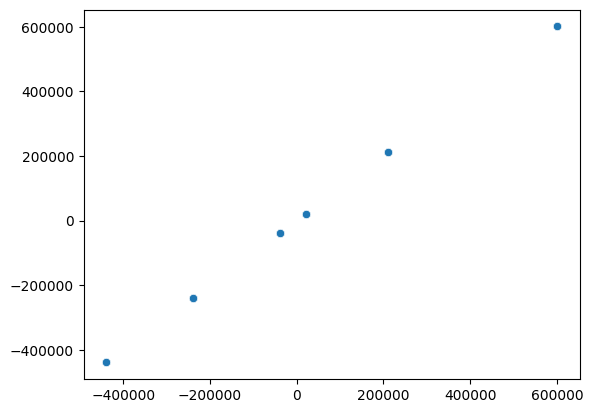

In [101]:
print("Número de componentes principales:", pca.n_components_)
sns.scatterplot(x=X_transformed[:, 0], y=X_transformed[:, 0])

# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

In [ ]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression